# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [1]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [ ]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

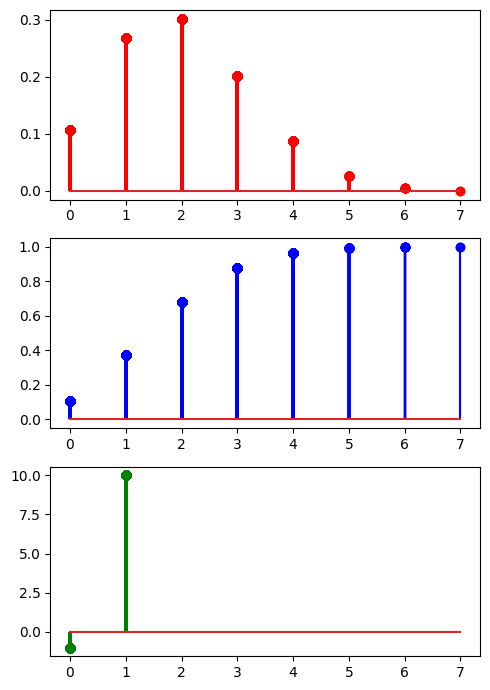

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [15]:
# TODO

from scipy.stats import norm

# Definir todas las funciones de probabilidad relacionadas con esta distribución.
# Toda la siguiente información se obtuvo de Google y de 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

"""
Calcula la estimación puntual de la distribución normal.
El siguiente método no aparece explícitamente en la documentación de norm en SciPy

resultado = None
"""

def pnorm(x, mu, sd):
    """
    Calcula el acumulado de la distribución normal.
    CDF: Cumulative Distribution Function
    """
    return norm.cdf(x = x, loc = mu, scale = sd)

def snorm(x, mu, sd):
    """
    Calcula 1 menos el acumulado de la distribución normal.
    SF: Survival Function
    """
    return norm.sf(x = x, loc = mu, scale = sd)

def qnorm(cdf, mu, sd):
    """
    Calcula la función cuantil a partir de la distribución normal.
    Inversa de CDF (según documentación)
    PPF: Percent Point Function
    """
    return norm.ppf(q = cdf, loc = mu, scale = sd)

def rnorm(n, mu, sd):
    """
    Genera variables aleatorias a partir de la distribución normal.
    RVS: Random Variates
    """
    return norm.rvs(loc = mu, scale = sd, size = n)

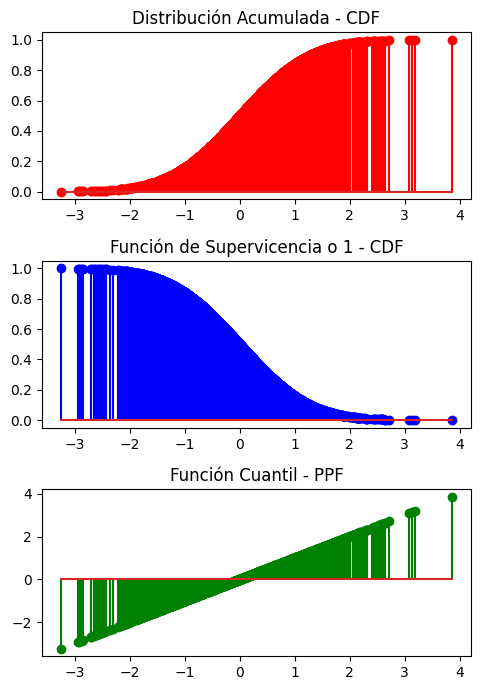

In [21]:
# Distribución normal(0, 1)
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

mu = 0
sd = 1

# generar datos distribuidos de forma normal
datos = rnorm(2000, mu, sd)

cdf = pnorm(datos, mu, sd)
sf = snorm(datos, mu, sd)
ppf = qnorm(cdf, mu, sd)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(datos, cdf, "r-")
axis[0].set_title("Distribución Acumulada - CDF")

axis[1].stem(datos, sf, "b-")
axis[1].set_title("Función de Supervicencia o 1 - CDF")

axis[2].stem(datos, ppf, "g-")
axis[2].set_title("Función Cuantil - PPF")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()